In [1]:
import pandas as pd

In [4]:
df = pd.read_excel('../imdb.xlsx', index_col=0)

In [5]:
df.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [7]:
df.shape

(748, 2)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
cv = CountVectorizer(max_features=500, stop_words='english')

In [10]:
tdm = cv.fit_transform(df['review'])

In [11]:
tdm

<748x500 sparse matrix of type '<class 'numpy.int64'>'
	with 3434 stored elements in Compressed Sparse Row format>

In [14]:
cv.get_feature_names()[:10]

['10',
 '20',
 '90',
 'absolutely',
 'acted',
 'acting',
 'action',
 'actor',
 'actors',
 'actress']

In [15]:
tdm.sum()

3894

In [16]:
tdm.sum(axis=0)

matrix([[ 29,   3,   6,   9,   3,  43,   7,  10,  19,   3,   3,  10,   3,
           4,   3,   4,   9,   3,   3,   3,   6,   3,   4,   3,  13,   4,
           3,   5,   3,   8,   5,   3,  14,  71,   4,  11,   4,   6,   8,
          25,  18,  10,   5,  10,   4,   3,   4,  10,   3,   3,   6,   7,
           3,   4,  10,   5,   3,  18,   6,   8,  24,  35,   4,   3,   7,
           3,   4,   5,   8,  10,   6,   5,   5,   7,   4,   3,   3,   5,
           3,   3,   4,   4,   7,   4,   5,   3,   4,   6,   4,   3,   5,
           4,   3,   5,   4,   3,   9,   3,   4,   3,  13,  11,  22,   5,
           3,   9,   5,  12,   6,   3,   9,  12,  26,   4,  10,   3,   3,
           3,   3,   4,   4,   3,   6,   3,   9,  11,  11,   4,   5,   3,
           9,   4,   6,   3,   8,   3,   3,  16,   4,   7,   4,   4,   5,
           8,   5,   7,   5,   7,   5,   3,   3,  10,   5, 163,  24,   3,
           3,   5,   6,   4,   5,  19,   3,   9,   3,   7,   5,   3,   4,
           3,   6,   3,   7,   3,   6,

In [17]:
word_count = pd.DataFrame({
    '단어' : cv.get_feature_names(),
    '빈도' : tdm.sum(axis=0).flat
})

In [18]:
word_count.sort_values('빈도', ascending=False)

,단어,빈도
284,movie,182
153,film,163
33,bad,71
225,just,63
178,good,58
...,...,...
375,sense,3
377,seriously,3
378,set,3
173,given,3


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
tfidf = TfidfVectorizer(max_features=500, stop_words='english')

In [21]:
tdm = tfidf.fit_transform(df['review'])

In [22]:
word_count = pd.DataFrame({
    '단어' : tfidf.get_feature_names(),
    '빈도' : tdm.sum(axis=0).flat
})

In [23]:
word_count.sort_values('빈도', ascending=False)

,단어,빈도
284,movie,44.917213
153,film,40.356390
33,bad,25.258572
225,just,20.296871
178,good,18.604656
...,...,...
181,graphics,0.174344
266,massive,0.174344
427,theme,0.138036
162,fx,0.138036


In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
cv = CountVectorizer(max_features=500, stop_words='english')

In [26]:
tdm2 = cv.fit_transform(df['review'])

In [27]:
from sklearn.feature_extraction.text import TfidfTransformer

In [28]:
trans = TfidfTransformer()

In [29]:
tdm3 = trans.fit_transform(tdm2)

In [30]:
import numpy as np

In [31]:
np.allclose(tdm.A, tdm3.A)

True

In [32]:
import pandas as pd

In [33]:
word_count = pd.read_csv('word_count.csv', index_col=0)

In [34]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
284,movie,182
153,film,163
33,bad,71
225,just,63
178,good,58


In [35]:
from wordcloud import WordCloud

In [36]:
wc = WordCloud(background_color='white', max_words=100, width=400, height=300)

In [37]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()

In [39]:
count_dic = dict(zip(word_count['단어'], word_count['빈도']))

In [40]:
cloud = wc.fit_words(count_dic)

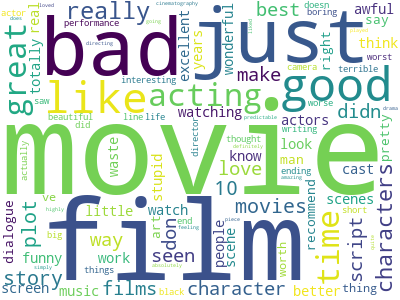

In [41]:
cloud.to_image()

In [42]:
import spacy

In [43]:
nlp = spacy.load('en_core_web_sm')

In [70]:
text = 'Wikipedia is maintained by volunteers.'

In [71]:
doc = nlp(text)

In [72]:
for token in doc:
    print(token.text,   
         token.lemma_,   # 표제어
         token.pos_,   # 품사(간략)
         token.tag_,   # 품사(자세)
         token.dep_,   # 문법적 의존관계
         token.is_stop)   # 불용어 포함관계

Wikipedia Wikipedia PROPN NNP nsubjpass False
is be AUX VBZ auxpass True
maintained maintain VERB VBN ROOT False
by by ADP IN agent True
volunteers volunteer NOUN NNS pobj False
. . PUNCT . punct False


In [47]:
spacy.explain('PROPN')

'proper noun'

In [50]:
def extract_nv(text):
    words = []
    doc = nlp(text)
    for token in doc:
        if token.tag_[0] in 'NV':
            words.append(token.lemma_.lower())
            
    return words

In [51]:
extract_nv('Apple is a company')

['apple', 'be', 'company']

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
cv = CountVectorizer(max_features=500, tokenizer=extract_nv, stop_words='english')

In [54]:
import pandas as pd

In [55]:
df = pd.read_excel('../imdb.xlsx', index_col=0)

In [56]:
tdm = cv.fit_transform(df['review'])

C:\Users\leeji\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['make'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [57]:
wc = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
})

In [58]:
wc.sort_values('빈도', ascending=False)

,단어,빈도
260,movie,211
118,film,189
45,character,59
230,make,58
480,watch,48
...,...,...
331,read,2
332,reality,2
333,realize,2
140,gets,2


In [129]:
def lemma_lower(text):
    words = []
    doc = nlp(text)
    for token in doc:
        if token.tag_[0] in 'NVAI':
            words.append(token.lemma_.lower())
        
    return words

In [130]:
cv = CountVectorizer(max_features=500, tokenizer=lemma_lower, stop_words='english')

In [131]:
tdm = cv.fit_transform(df['review'])

C:\Users\leeji\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['make'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [132]:
wc = pd.DataFrame({
    '단어' : cv.get_feature_names(),
    '빈도' : tdm.sum(axis=0).flat
})

In [133]:
wc.sort_values('빈도', ascending=False)

,단어,빈도
284,movie,211
137,film,189
61,character,59
254,make,58
235,like,56
...,...,...
308,parent,2
309,past,2
315,peter,2
316,pg,2
